In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
data = pd.read_csv("EURUSD_ohlc.csv", parse_dates=[0], index_col=0)
data

In [ ]:
data.info()

In [ ]:
data.loc["2010-05":"2011-08", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
# plt.hlines(y = 1.26, xmin = "06-2010", xmax = "06-2011", color = "green", label = "Retracement/Support")
plt.legend(fontsize=12)
plt.show()

In [ ]:
high = data.loc['06-2010':'08-2010', 'Close'].max()
high

In [ ]:
low = data.loc['06-2010':'08-2010', 'Close'].min()
low

In [ ]:
fifty_percent = (low + high) / 2
fifty_percent

In [ ]:
fibonacci1 = 0.236
fibonacci1

In [ ]:
R1 = high - (high-low) * fibonacci1
R1

In [ ]:
fibonacci2 = 0.382
fibonacci2

In [ ]:
R2 = high - (high-low) * fibonacci2
R2

In [ ]:
fibonacci3 = 0.618
fibonacci3

In [ ]:
R3 = high - (high-low) * fibonacci3
R3

In [ ]:
data.loc["05-2010":"08-2011", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
# plt.hlines(y = 1.26, xmin = "06-2010", xmax = "06-2011", color = "green", label = "Actual Retracement/Support")
# plt.hlines(y = R1, xmin = "06-2010", xmax = "06-2011", color = "red", label = "R1 (23.6%)")
# plt.hlines(y = R2, xmin = "06-2010", xmax = "06-2011", color = "grey", label = "R2 (38.2%)")
# plt.hlines(y = R3, xmin = "06-2010", xmax = "06-2011", color = "purple", label = "R3 (61.8%)")

In [ ]:
data.loc["10-2011":"12-2012", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)

In [ ]:
data.loc["10-2011":"12-2012", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
# plt.hlines(y = 1.35, xmin = "10-2011", xmax = "12-2012", color = "red")

In [ ]:
low = data.loc['10-2011':'03-2012', 'Close'].min()
low

In [ ]:
high = data.loc['10-2011':'03-2012', 'Close'].max()
high

In [ ]:
print(fibonacci1, fibonacci2, fibonacci3)

### 지역 고가 파악하기

In [ ]:
from scipy.signal import argrelextrema

In [ ]:
data

In [ ]:
hh = data.High.copy()
hh

In [ ]:
order = 70

In [ ]:
local_max = argrelextrema(hh.values, np.greater_equal, order=order)
local_max

In [ ]:
data.index[local_max]

In [ ]:
data.High.values[local_max]

In [ ]:
data.Close.plot(figsize=(20, 8))
plt.vlines(x=data.index[local_max], ymin=data.Low.min(), ymax=data.High.max(), color='g')
plt.show()

In [ ]:
ll = data.Low.copy()
ll

In [ ]:
local_min = argrelextrema(ll.values, np.less_equal, order=order)
local_min

In [ ]:
data.index[local_min]

In [ ]:
data.Low.values[local_min]

In [ ]:
data.Close.plot(figsize=(20, 8))
plt.vlines(x = data.index[local_min], ymin=data.Low.min(), ymax=data.High.max(), color='r')
plt.vlines(x=data.index[local_max], ymin=data.Low.min(), ymax=data.High.max(), color='g')

### 고가

In [ ]:
data['hh'] = np.nan
data['hh_date'] = np.nan
data

In [ ]:
for bar in range(len(data)):
    date = data.index[bar]
    hh = data.iloc[:bar + 1].High

    local_max = argrelextrema(hh.values, np.greater_equal, order=order)

    data.loc[date, 'hh'] = data.High.values[local_max][-1]

    data.loc[date, 'hh_date'] = data.index[local_max][-1]

In [ ]:
data

In [ ]:
data['ll'] = np.nan
data['ll_date'] = np.nan
data

In [ ]:
for bar in range(len(data)):
    date = data.index[bar]
    hh = data.iloc[:bar + 1].Low

    local_min = argrelextrema(hh.values, np.less_equal, order=order)

    data.loc[date, 'll'] = data.Low.values[local_min][-1]

    data.loc[date, 'll_date'] = data.index[local_min][-1]

In [ ]:
data

In [ ]:
data.info()

### 추세 파악하기

In [ ]:
data.loc["2010":"2011", ["Close", "hh", "ll"]].plot(figsize=(12, 8), title="EUR/USD", fontsize=12)
plt.show()

In [ ]:
data['Trend'] = np.where(data.hh_date > data.ll_date, 1, -1)
data

In [ ]:
data.loc["2010":"2011", ["Close", "hh", "ll", "Trend"]].plot(figsize=(12, 8), title="EUR/USD", fontsize=12, secondary_y='Trend')
plt.show()

In [ ]:
data['Trend'] = np.where(data.hh_date > data.ll_date, "Up", "Down")
data

In [ ]:
data.drop(columns=["hh_date", "ll_date"], inplace=True)
data

In [ ]:
data.Trend.value_counts()

In [ ]:
data["R23.6"] = np.where(data.Trend == "Up", data.hh - (data.hh-data.ll) * 0.236, data.hh - (data.hh - data.ll) * (1 - 0.236))
data

In [ ]:
data.info()

In [ ]:
data["R38.2"] = np.where(data.Trend == "Up", data.hh - (data.hh-data.ll) * 0.382, data.hh - (data.hh - data.ll) * (1 - 0.382))
data

### 피보나치 되돌림 돌파 전략

In [ ]:
data

중립 전략: 새로운 고점이나 저점에 도달했을 때

In [ ]:
data['position'] = np.where((data.hh != data.hh.shift()) | (data.ll != data.ll.shift()), 0, np.nan)
data

In [ ]:
data.position.value_counts()

### 하향 추세

##### 23.6퍼센트의 피보나치 저항선을 돌파하면 롱 포지션 진입

In [ ]:
data['position'] = np.where((data.Trend == "Down") & (data.Close.shift() < data["R23.6"].shift()) & (data.Close > data["R23.6"]), 1, data.position)

##### 가격이 38.2 퍼센트를 도달하거나 돌파하면 중립 포지션 전환(수익)

In [ ]:
data['position'] = np.where((data.Trend == "Down") & (data.Close.shift() < data["R38.2"].shift()) & (data.Close >= data["R38.2"]), 0, data.position)

##### 가격이 이전 저점에 도달하거나 돌파할때

In [ ]:
data['position'] = np.where((data.Trend == "Down") & (data.Close.shift() > data.ll.shift()) & (data.Close <= data.ll), 0, data.position)

In [ ]:
data.position.value_counts()

### 상향 추세

##### 23.6퍼센트 돌파하면 숏 포지션 진입

In [ ]:
data['position'] = np.where((data.Trend == 'Up') & (data.Close.shift() > data['R23.6'].shift()) & (data.Close < data["R23.6"]), -1, data.position)

In [ ]:
data.position.value_counts()

##### 38.2 퍼센트 도달, 돌파하면 중립 포지션 전환(수익)

In [ ]:
data['position'] = np.where((data.Trend == "Up") & (data.Close.shift() > data["R38.2"].shift()) & (data.Close <= data["R38.2"]), 0, data.position)

##### 이전 고가에 도달하거나 돌파하면 중립 포지션 전환(손실)

In [ ]:
data['position'] = np.where((data.Trend == "Up") & (data.Close.shift() < data.hh.shift()) & (data.Close >= data.hh), 0, data.position)

##### 새로운 고점이나 저점에 도달했을 때 중립 포지션 전환(추세가 변경되었을 때)

In [ ]:
data['position'] = np.where((data.hh != data.hh.shift()) | (data.ll != data.ll.shift()), 0, data.position)

In [ ]:
data['position'] = data.position.ffill()

In [ ]:
data.position.value_counts()

In [ ]:
data

In [ ]:
data.loc[:, ["Close", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y="position")

### 벡터화 전략 백테스팅

In [ ]:
data['returns'] = np.log(data.Close.div(data.Close.shift(1)))

In [ ]:
data.dropna(inplace=True)

In [67]:
data

,Open,High,Low,Close,hh,ll,Trend,R23.6,R38.2,position,returns
2008-01-02,1.47146,1.47812,1.46876,1.47510,1.47812,1.45885,Up,1.473572,1.470759,0.0,0.002471
2008-01-03,1.47504,1.48254,1.46958,1.47429,1.48254,1.45885,Up,1.476949,1.473490,0.0,-0.000549
2008-01-05,1.47451,1.47559,1.47430,1.47465,1.48254,1.45885,Up,1.476949,1.473490,0.0,0.000244
2008-01-06,1.47465,1.47560,1.46586,1.46954,1.48254,1.45885,Up,1.476949,1.473490,0.0,-0.003471
2008-01-07,1.46954,1.47444,1.46804,1.47078,1.48254,1.45885,Up,1.476949,1.473490,0.0,0.000843
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.22728,1.16027,Up,1.211466,1.201682,0.0,-0.000057
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.22728,1.16027,Up,1.211466,1.201682,0.0,0.002484
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.22752,1.16027,Up,1.211649,1.201831,0.0,0.002861
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.23102,1.16027,Up,1.214323,1.203993,0.0,0.004057


In [68]:
data['strategy'] = data.position.shift(1) * data["returns"]
data

,Open,High,Low,Close,hh,ll,Trend,R23.6,R38.2,position,returns,strategy
2008-01-02,1.47146,1.47812,1.46876,1.47510,1.47812,1.45885,Up,1.473572,1.470759,0.0,0.002471,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,1.48254,1.45885,Up,1.476949,1.473490,0.0,-0.000549,-0.0
2008-01-05,1.47451,1.47559,1.47430,1.47465,1.48254,1.45885,Up,1.476949,1.473490,0.0,0.000244,0.0
2008-01-06,1.47465,1.47560,1.46586,1.46954,1.48254,1.45885,Up,1.476949,1.473490,0.0,-0.003471,-0.0
2008-01-07,1.46954,1.47444,1.46804,1.47078,1.48254,1.45885,Up,1.476949,1.473490,0.0,0.000843,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.22728,1.16027,Up,1.211466,1.201682,0.0,-0.000057,-0.0
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.22728,1.16027,Up,1.211466,1.201682,0.0,0.002484,0.0
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.22752,1.16027,Up,1.211649,1.201831,0.0,0.002861,0.0
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.23102,1.16027,Up,1.214323,1.203993,0.0,0.004057,0.0


In [69]:
data.dropna(inplace=True)

In [70]:
ptc = 0.00007

In [71]:
data['trades'] = data.position.diff().fillna(0).abs()

In [72]:
data.trades.value_counts()

0.0    3645
1.0     164
Name: trades, dtype: int64

In [73]:
data['strategy_net'] = data.strategy - data.trades * ptc

In [74]:
data['creturns'] = data['returns'].cumsum().apply(np.exp)

In [75]:
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

In [76]:
data['cstrategy_net'] = data['strategy_net'].cumsum().apply(np.exp)

In [78]:
data

,Open,High,Low,Close,hh,ll,Trend,R23.6,R38.2,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
2008-01-03,1.47504,1.48254,1.46958,1.47429,1.48254,1.45885,Up,1.476949,1.473490,0.0,-0.000549,-0.0,0.0,-0.0,0.999451,1.000000,1.000000
2008-01-05,1.47451,1.47559,1.47430,1.47465,1.48254,1.45885,Up,1.476949,1.473490,0.0,0.000244,0.0,0.0,0.0,0.999695,1.000000,1.000000
2008-01-06,1.47465,1.47560,1.46586,1.46954,1.48254,1.45885,Up,1.476949,1.473490,0.0,-0.003471,-0.0,0.0,-0.0,0.996231,1.000000,1.000000
2008-01-07,1.46954,1.47444,1.46804,1.47078,1.48254,1.45885,Up,1.476949,1.473490,0.0,0.000843,0.0,0.0,0.0,0.997071,1.000000,1.000000
2008-01-08,1.47074,1.47426,1.46394,1.46594,1.48254,1.45885,Up,1.476949,1.473490,0.0,-0.003296,-0.0,0.0,-0.0,0.993790,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.22728,1.16027,Up,1.211466,1.201682,0.0,-0.000057,-0.0,0.0,-0.0,0.826039,1.239926,1.225773
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.22728,1.16027,Up,1.211466,1.201682,0.0,0.002484,0.0,0.0,0.0,0.828093,1.239926,1.225773
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.22752,1.16027,Up,1.211649,1.201831,0.0,0.002861,0.0,0.0,0.0,0.830466,1.239926,1.225773
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.23102,1.16027,Up,1.214323,1.203993,0.0,0.004057,0.0,0.0,0.0,0.833842,1.239926,1.225773


<Axes: >

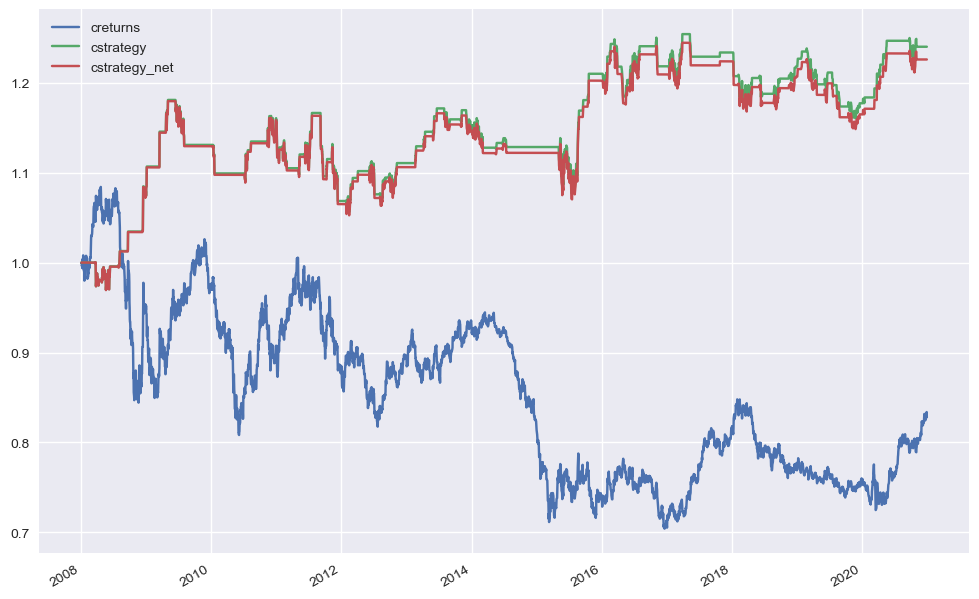

In [79]:
data[['creturns', 'cstrategy', 'cstrategy_net']].plot(figsize=(12, 8))